In [53]:
import numpy as np
from numpy.linalg import norm
import operator 
from operator import itemgetter

'''Euclidean distance'''
def euc_dist(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

'''Manhattan distance'''
def Manhattan_dist(x1,x2):
    return np.sum(abs(x1-x2))

'''cosine distance'''
def cosine_dist(x1,x2):
    return 1- np.dot(x1,x2)/(norm(x1)*norm(x2))

'''K-nearest neighbor algorithm implementation using different K parameter and distance function '''
class KNN:
    def __init__(self, K=3,dist_func =euc_dist ):
        self.K = K
        self.dist_func = dist_func
    def fit(self, x_train, y_train):
        self.X_train = x_train
        self.Y_train = y_train
        
    def predict(self, X_test):
        predictions = [] 
        for i in range(len(X_test)):
            dist = np.array([self.dist_func(X_test[i], x_t) for x_t in   
            self.X_train])
            dist_sorted = dist.argsort()[:self.K]
            neigh_count = {}
            for idx in dist_sorted:
                if self.Y_train[idx] in neigh_count:
                    neigh_count[self.Y_train[idx]] += 1
                else:
                    neigh_count[self.Y_train[idx]] = 1
            sorted_neigh_count = sorted(neigh_count.items(),    
            key=operator.itemgetter(1), reverse=True)
            predictions.append(sorted_neigh_count[0][0]) 
        return predictions


    '''error calculator function'''
    def err_cal(self,pred,org):
        err = 0;
        num=len(pred)
        for n in range(num):
            if(pred[n] != org[n]):
                err=err+1
        return err/num




In [54]:
import numpy as np 
from sklearn.utils import shuffle
#load data from dataset    
from sklearn.datasets import load_digits
mnist = load_digits()
#print(mnist.data.shape)
X = mnist.data 
y = mnist.target

'''split up data into train, validation and test set'''
all_data = X.size/64
# m denotes the number of trainnig data 
m=.6
# s denotes the number of validating data 
s=.2

'''Balanced distribution of different data between 3 sets'''
X_sorted=[]
y_sorted=[]

position = np.zeros((10,1),dtype = int).tolist()
for i in range(y.size):
    value = y[i]
    position[value].append(i)

for c in range(10):
    for d in range(len(position[c])):
        y_sorted.append(y[position[c][d]])
        X_sorted.append(X[position[c][d]])

X_train = []
y_train = []

X_val = []
y_val = []

X_test = []
y_test = []

start_index = 0

for i in range(10):
    max1 = len(position[i])
    
    for k in range(int(max1*m)):
        y_train.append(y_sorted[k+start_index])
        X_train.append(X_sorted[k+start_index])

    for k in range( int(max1*m)+1, int(max1*(m+s)) ):
            y_val.append(y_sorted[k+start_index])
            X_val.append(X_sorted[k+start_index])                

    for k in range(int(max1*(m+s)),max1):
            y_test.append(y_sorted[k+start_index])
            X_test.append(X_sorted[k+start_index]) 

    start_index = start_index + max1

'''shuffle data'''                    
X,y = shuffle(X_sorted,y_sorted)


In [56]:
'''finding the most efficient model'''
kVals = np.arange(3,10,2)
dist_funcs = [euc_dist , Manhattan_dist , cosine_dist]
accuracies = []
for k in kVals:
    for distance in dist_funcs:
      model = KNN(K = k,dist_func = distance)
      model.fit(X_train, y_train)
      pred = model.predict(X_val)
      accuracy_score=1-model.err_cal(y_val, pred)
      accuracies.append(accuracy_score)
      print("K = "+str(k)+ " and Distance = " + str(distance.__name__) +  " ; Accuracy: "+str(accuracy_score))




K = 3 and Distance = euc_dist ; Accuracy: 0.9715909090909091
K = 3 and Distance = Manhattan_dist ; Accuracy: 0.9573863636363636
K = 3 and Distance = cosine_dist ; Accuracy: 0.9659090909090909
K = 5 and Distance = euc_dist ; Accuracy: 0.96875
K = 5 and Distance = Manhattan_dist ; Accuracy: 0.9630681818181818
K = 5 and Distance = cosine_dist ; Accuracy: 0.9715909090909091
K = 7 and Distance = euc_dist ; Accuracy: 0.96875
K = 7 and Distance = Manhattan_dist ; Accuracy: 0.96875
K = 7 and Distance = cosine_dist ; Accuracy: 0.96875
K = 9 and Distance = euc_dist ; Accuracy: 0.9630681818181818
K = 9 and Distance = Manhattan_dist ; Accuracy: 0.9659090909090909
K = 9 and Distance = cosine_dist ; Accuracy: 0.9602272727272727


# Conclusion 1
as can be seen, based on accuracy results. We select model with K=3 and Euclidean distance


In [67]:
'''choosing model with K=3 and Euclidean distance function as the most efficient model'''
model = KNN(K = 3,dist_func = euc_dist)
model.fit(X_train, y_train)

#calculate train error
pred_train = model.predict(X_train)
err_train = model.err_cal(y_train,pred_train)
print("Train Error:"+ str(err_train))

#calculate validation error
pred_val = model.predict(X_val)
err_val = model.err_cal(y_val,pred_val)
print("Validation Error:"+ str(err_val))

#calculate test error
pred_test = model.predict(X_test)
err_test = model.err_cal(y_test,pred_test)
print("Test Error:"+ str(err_test))

partA_err = [err_train,err_val,err_test]



Train Error:0.005555555555555556
Validation Error:0.028409090909090908
Test Error:0.043835616438356165


In [60]:
#Confusion matrix 
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test, pred_test))
confusion_matrix_A = confusion_matrix(y_test, pred_test)

[[35  0  0  0  1  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 1  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 31  0  1  0  2  2  1]
 [ 0  0  0  0 34  0  0  0  0  3]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  2  0  0  0  0  0  0 33  0]
 [ 0  0  0  1  0  2  0  0  0 34]]


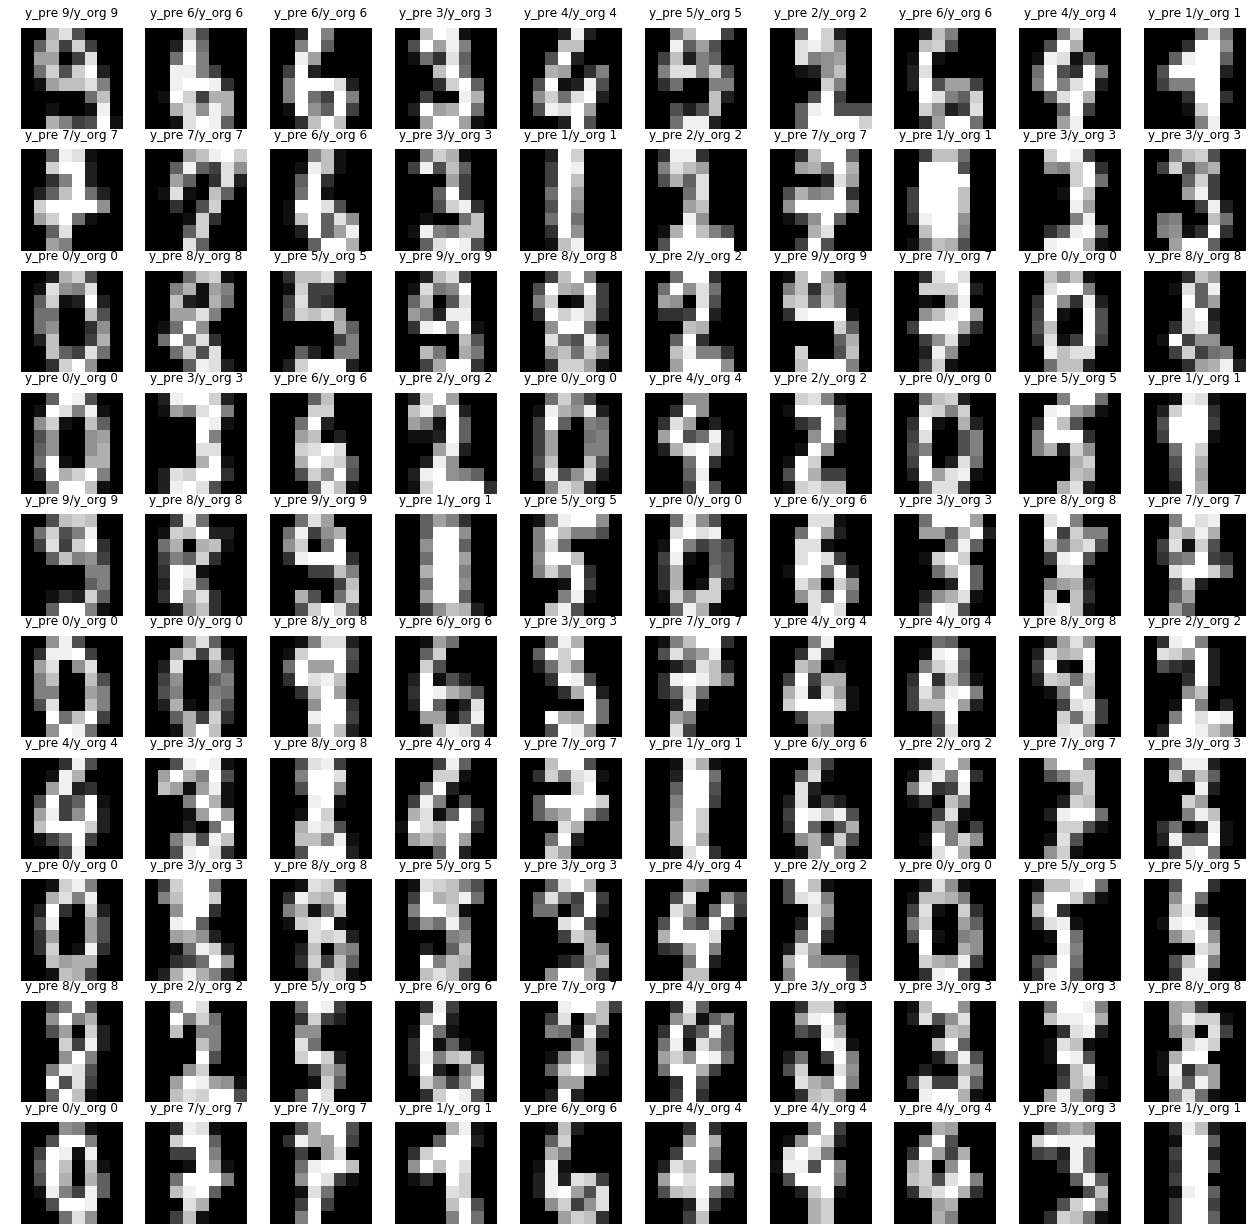

In [64]:
'''plot digit number images labeled by prediction value and original value'''
import random
import matplotlib.pyplot as plt
#generate a list consist of 100 position in test part of  dataset
list= []
while len(list)<100:
    r=random.randint(int(m+s+1),int(all_data-1))
    if r not in list:list.append(r)


X_test_new = []
y_test_new = []
for k in list:
    X_test_new.append(mnist.data[k])
    y_test_new.append(mnist.target[k])
    
pred = model.predict(X_test_new)        
        
nrows, ncols = 10, 10
fig, axes = plt.subplots(nrows, ncols,figsize=(22, 22))        
for i in range(nrows):
    for j in range(ncols):
        # Image index
        count = j + i * ncols
        k=list[count]
        ax = axes[i, j]
        ax.matshow(mnist.images[k, ...],
                   cmap=plt.cm.gray)
        ax.set_axis_off()
        ax.set_title("y_pre "+str(pred[count]) +"/y_org " +str(y_test_new[count]))

# $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ Part B

K = 3 ; Accuracy: 0.9772727272727273
K = 5 ; Accuracy: 0.9715909090909091
K = 7 ; Accuracy: 0.9715909090909091
K = 9 ; Accuracy: 0.9602272727272727
K = 11 ; Accuracy: 0.9630681818181818
K = 13 ; Accuracy: 0.9602272727272727
K = 15 ; Accuracy: 0.9545454545454546
K = 17 ; Accuracy: 0.9431818181818182
K = 19 ; Accuracy: 0.9403409090909091


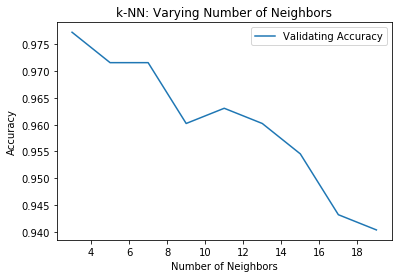

In [65]:
'''now we use pre-prepared library for implementing KNN algorithm'''
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets

#load data from dataset
digits = datasets.load_digits()
X = digits.data
y = digits.target

'''split up data into train, validation and test set'''
all_data = X.size/64
# m denotes the number of trainnig data 
m=.6
# s denotes the number of validating data 
s=.2

'''Balanced distribution of different data between 3 sets'''
X_sorted=[]
y_sorted=[]

position = np.zeros((10,1),dtype = int).tolist()
for i in range(y.size):
    value = y[i]
    position[value].append(i)

for c in range(10):
    for d in range(len(position[c])):
        y_sorted.append(y[position[c][d]])
        X_sorted.append(X[position[c][d]])

X_train = []
y_train = []

X_val = []
y_val = []

X_test = []
y_test = []

start_index = 0

for i in range(10):
    max1 = len(position[i])
    
    for k in range(int(max1*m)):
        y_train.append(y_sorted[k+start_index])
        X_train.append(X_sorted[k+start_index])

    for k in range( int(max1*m)+1, int(max1*(m+s)) ):
            y_val.append(y_sorted[k+start_index])
            X_val.append(X_sorted[k+start_index])                

    for k in range(int(max1*(m+s)),max1):
            y_test.append(y_sorted[k+start_index])
            X_test.append(X_sorted[k+start_index]) 

    start_index = start_index + max1

'''shuffle data'''                    
X,y = shuffle(X_sorted,y_sorted)

validation_accuracy = []

def learn(k) :
    """this function is used to find the efficiency of algorithm for different values of k and just prints them"""
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    validation_accuracy.append(knn.score(X_val, y_val))
    print("K = "+str(k)+   " ; Accuracy: "+str(knn.score(X_val, y_val)))

kVals = np.arange(3,20,2)
accuracies = []

for k in kVals:
    learn(k)
        
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(kVals, validation_accuracy, label = 'Validating Accuracy')
#plt.plot(kVals, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

plt.show()
#plt.savefig('efficiencycomparison.png')
    
    


# Conclusion 1
as can be seen, based on accuracy results. We select model with K=3 


In [68]:
'''calculate test and train Error'''
K=3
knn = KNeighborsClassifier(n_neighbors = K)
knn.fit(X_train,y_train)
print("K = "+str(K)+   " ; Train Error:      "+str(1-knn.score(X_train, y_train)))
print("K = "+str(K)+   " ; Validation Error: "+str(1-knn.score(X_val, y_val)))
print("K = "+str(K)+   " ; Test Error:       "+str(1-knn.score(X_test, y_test)))

partB_error = [1-knn.score(X_train, y_train) , 1-knn.score(X_val, y_val) , 1-knn.score(X_test, y_test) ]

K = 3 ; Train Error:      0.0064814814814815325
K = 3 ; Validation Error: 0.022727272727272707
K = 3 ; Test Error:       0.04109589041095896


In [69]:
'''Confusion matrix '''
from sklearn.metrics import confusion_matrix
pred_test1 = knn.predict(X_test)
print (confusion_matrix(y_test, pred_test1))
confusion_matrix_B = confusion_matrix(y_test, pred_test1)

[[35  0  0  0  1  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 1  0 35  0  0  0  0  0  0  0]
 [ 0  0  1 32  0  1  0  2  1  0]
 [ 0  0  0  0 34  0  0  1  0  2]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  2  0  0  0  0  0  0 33  0]
 [ 0  0  0  1  0  2  0  0  0 34]]


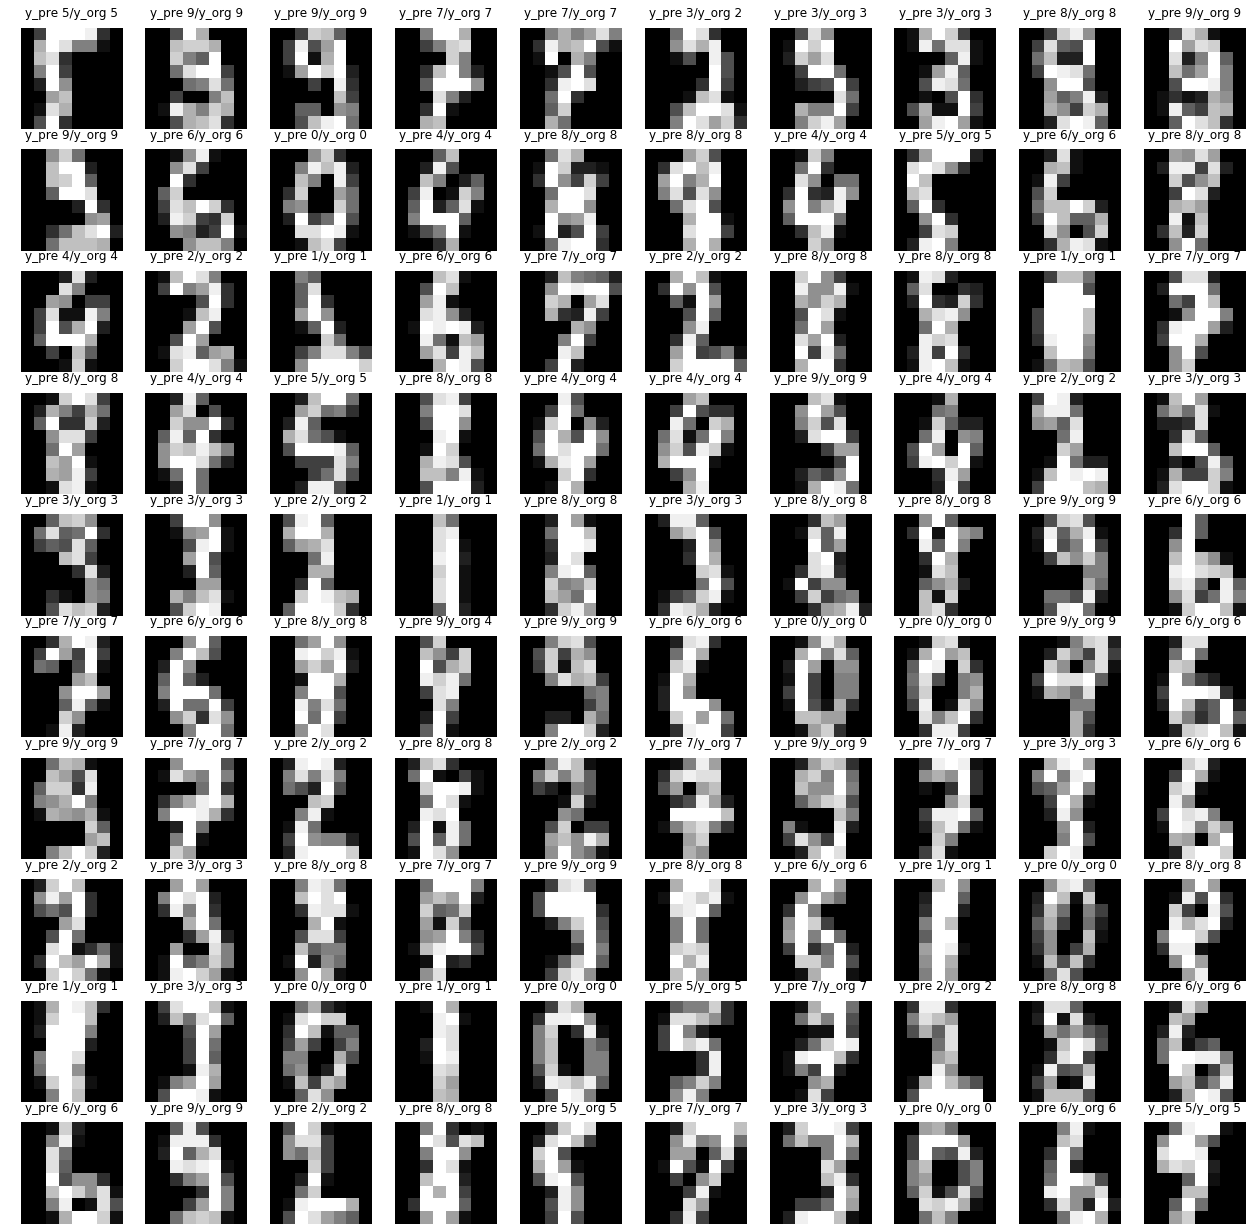

In [70]:
'''generate a list consist of 100 position in test part of  dataset'''
list= []
while len(list)<100:
    r=random.randint(int(m+s+1),int(all_data-1))
    if r not in list:list.append(r)


X_test_new = []
y_test_new = []
for k in list:
    X_test_new.append(mnist.data[k])
    y_test_new.append(mnist.target[k])
    
predictions_test = knn.predict(X_test_new)

nrows, ncols = 10, 10
fig, axes = plt.subplots(nrows, ncols,figsize=(22, 22))        
for i in range(nrows):
    for j in range(ncols):
        # Image index
        count = j + i * ncols
        k=list[count]
        ax = axes[i, j]
        ax.matshow(mnist.images[k, ...],
                   cmap=plt.cm.gray)
        ax.set_axis_off()
        ax.set_title("y_pre "+str(predictions_test[count]) +"/y_org " +str(y_test_new[count]))

# Comparsion


In [71]:
print('Train Error        A: ' +str(partA_err[0]) + '  B: '+str(partB_error[0]) )
print('Validation Error   A: ' +str(partA_err[1]) + ' B: '+str(partB_error[2]) )
print('Test Error         A: ' +str(partA_err[2]) + '  B: '+str(partB_error[2]) )

Train Error        A: 0.005555555555555556  B: 0.0064814814814815325
Validation Error   A: 0.028409090909090908 B: 0.04109589041095896
Test Error         A: 0.043835616438356165  B: 0.04109589041095896


In [72]:
from colorama import Fore
print(Fore.BLUE +'Part A Confusion Matrix \n')
print(Fore.BLACK +str(confusion_matrix_A) )

print(Fore.BLUE +'\n Part B Confusion Matrix \n')
print(Fore.BLACK +str(confusion_matrix_B) )

Part A Confusion Matrix 

[[35  0  0  0  1  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 1  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 31  0  1  0  2  2  1]
 [ 0  0  0  0 34  0  0  0  0  3]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  2  0  0  0  0  0  0 33  0]
 [ 0  0  0  1  0  2  0  0  0 34]]

 Part B Confusion Matrix 

[[35  0  0  0  1  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 1  0 35  0  0  0  0  0  0  0]
 [ 0  0  1 32  0  1  0  2  1  0]
 [ 0  0  0  0 34  0  0  1  0  2]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  2  0  0  0  0  0  0 33  0]
 [ 0  0  0  1  0  2  0  0  0 34]]
